In [1]:
import pandas as pd
import string
import re
from sklearn.feature_extraction.text import TfidfVectorizer

df = pd.read_csv('C:\\Users\\Dell\\Downloads\\archive\\test.csv', header=None)

df.columns = ['rating', 'review', 'extended_review']

print(df.head())
print(df.tail())

   rating                                             review  \
0       2                                           Great CD   
1       2  One of the best game music soundtracks - for a...   
2       1                   Batteries died within a year ...   
3       2              works fine, but Maha Energy is better   
4       2                       Great for the non-audiophile   

                                     extended_review  
0  My lovely Pat has one of the GREAT voices of h...  
1  Despite the fact that I have only played a sma...  
2  I bought this charger in Jul 2003 and it worke...  
3  Check out Maha Energy's website. Their Powerex...  
4  Reviewed quite a bit of the combo players and ...  
        rating                           review  \
399995       1       Unbelievable- In a Bad Way   
399996       1  Almost Great, Until it Broke...   
399997       1                 Disappointed !!!   
399998       2          Classic Jessica Mitford   
399999       1      Comedy Sce

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400000 entries, 0 to 399999
Data columns (total 3 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   rating           400000 non-null  int64 
 1   review           399976 non-null  object
 2   extended_review  400000 non-null  object
dtypes: int64(1), object(2)
memory usage: 9.2+ MB


In [3]:
def clean_text(text):
    
    translator = str.maketrans('', '', string.punctuation)
    text = text.translate(translator)
    
    text = text.replace('\n', ' ').replace('\r', '')
    
    text = re.sub(r'\s+', ' ', text).strip()
    
    text = text.replace('\\"', '"')
    
    text = text.lower()
    
    return text

df['cleaned_reviews'] = df['extended_review'].apply(clean_text)

print(df)

        rating                                             review  \
0            2                                           Great CD   
1            2  One of the best game music soundtracks - for a...   
2            1                   Batteries died within a year ...   
3            2              works fine, but Maha Energy is better   
4            2                       Great for the non-audiophile   
...        ...                                                ...   
399995       1                         Unbelievable- In a Bad Way   
399996       1                    Almost Great, Until it Broke...   
399997       1                                   Disappointed !!!   
399998       2                            Classic Jessica Mitford   
399999       1                        Comedy Scene, and Not Heard   

                                          extended_review  \
0       My lovely Pat has one of the GREAT voices of h...   
1       Despite the fact that I have only played 

In [4]:
df

,rating,review,extended_review,cleaned_reviews
0,2,Great CD,My lovely Pat has one of the GREAT voices of h...,my lovely pat has one of the great voices of h...
1,2,One of the best game music soundtracks - for a...,Despite the fact that I have only played a sma...,despite the fact that i have only played a sma...
2,1,Batteries died within a year ...,I bought this charger in Jul 2003 and it worke...,i bought this charger in jul 2003 and it worke...
3,2,"works fine, but Maha Energy is better",Check out Maha Energy's website. Their Powerex...,check out maha energys website their powerex m...
4,2,Great for the non-audiophile,Reviewed quite a bit of the combo players and ...,reviewed quite a bit of the combo players and ...
...,...,...,...,...
399995,1,Unbelievable- In a Bad Way,We bought this Thomas for our son who is a hug...,we bought this thomas for our son who is a hug...
399996,1,"Almost Great, Until it Broke...",My son recieved this as a birthday gift 2 mont...,my son recieved this as a birthday gift 2 mont...
399997,1,Disappointed !!!,"I bought this toy for my son who loves the ""Th...",i bought this toy for my son who loves the tho...
399998,2,Classic Jessica Mitford,This is a compilation of a wide range of Mitfo...,this is a compilation of a wide range of mitfo...


In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['cleaned_reviews'])


In [6]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['rating_encoded'] = le.fit_transform(df['rating'])
y = df['rating_encoded']


In [7]:
df

,rating,review,extended_review,cleaned_reviews,rating_encoded
0,2,Great CD,My lovely Pat has one of the GREAT voices of h...,my lovely pat has one of the great voices of h...,1
1,2,One of the best game music soundtracks - for a...,Despite the fact that I have only played a sma...,despite the fact that i have only played a sma...,1
2,1,Batteries died within a year ...,I bought this charger in Jul 2003 and it worke...,i bought this charger in jul 2003 and it worke...,0
3,2,"works fine, but Maha Energy is better",Check out Maha Energy's website. Their Powerex...,check out maha energys website their powerex m...,1
4,2,Great for the non-audiophile,Reviewed quite a bit of the combo players and ...,reviewed quite a bit of the combo players and ...,1
...,...,...,...,...,...
399995,1,Unbelievable- In a Bad Way,We bought this Thomas for our son who is a hug...,we bought this thomas for our son who is a hug...,0
399996,1,"Almost Great, Until it Broke...",My son recieved this as a birthday gift 2 mont...,my son recieved this as a birthday gift 2 mont...,0
399997,1,Disappointed !!!,"I bought this toy for my son who loves the ""Th...",i bought this toy for my son who loves the tho...,0
399998,2,Classic Jessica Mitford,This is a compilation of a wide range of Mitfo...,this is a compilation of a wide range of mitfo...,1


In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report

# Assuming your DataFrame is 'df' and 'cleaned_reviews' is your cleaned text column
X = df['cleaned_reviews']  # Features: the text data
y = df['rating_encoded']  # Labels: the target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ensure that X_train and X_test contain raw text
print(type(X_train.iloc[0]))  # Should be <class 'str'>

# Create a pipeline that includes TfidfVectorizer and MultinomialNB
model = make_pipeline(TfidfVectorizer(), MultinomialNB())

# Train the model using the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))


<class 'str'>
              precision    recall  f1-score   support

           0       0.80      0.85      0.83     39896
           1       0.85      0.79      0.82     40104

    accuracy                           0.82     80000
   macro avg       0.82      0.82      0.82     80000
weighted avg       0.82      0.82      0.82     80000



Accuracy: 0.823125


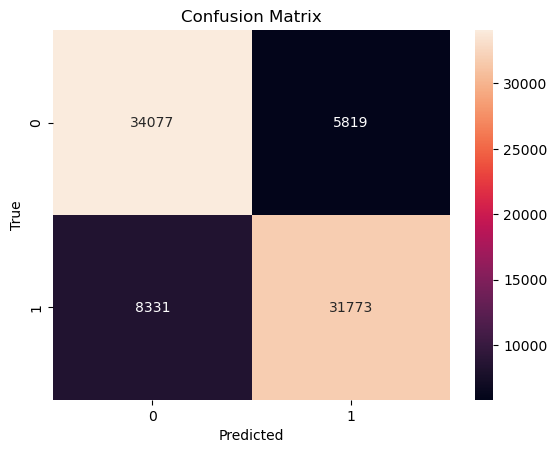

In [13]:
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
